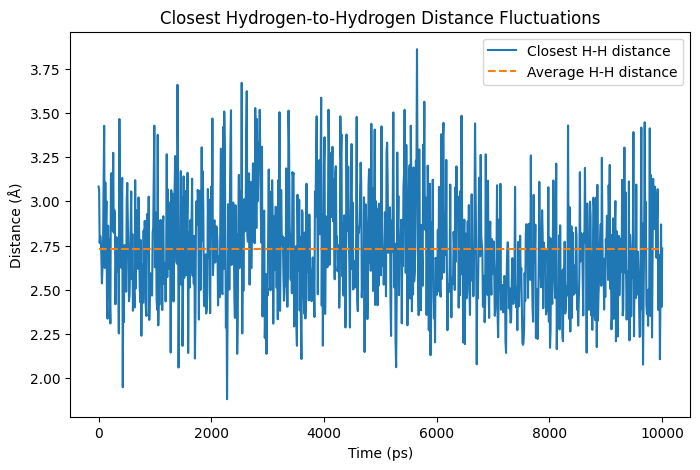

In [7]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.distances import distance_array

# Load the simulation files
u = mda.Universe("md_0_1.gro", "md_0_1.xtc")

# Select TRP 306 and TRP 359 hydrogens
# Select hydrogens in TRP 306
trp306_h = u.select_atoms("resid 306 and name H*")
# Select hydrogens in TRP 359
trp359_h = u.select_atoms("resid 359 and name H*")

# Prepare arrays to store distances
time = []
closest_distances = []

# Loop through trajectory
for ts in u.trajectory:
    time.append(ts.time)  # Store time
    # Calculate all distances between TRP 306 and TRP 359 hydrogens
    distances = distance_array(trp306_h.positions, trp359_h.positions)
    closest_distances.append(np.min(distances))  # Store the minimum distance
# Draw an averaged distance line for reference
average_distance = np.mean(closest_distances)
average_distances = [average_distance for _ in time]

# Plot the closest distance fluctuation
plt.figure(figsize=(8, 5))
plt.plot(time, closest_distances, label="Closest H-H distance")
plt.plot(time, average_distances, "--", label="Average H-H distance")
plt.xlabel("Time (ps)")
plt.ylabel("Distance (Å)")
plt.title("Closest Hydrogen-to-Hydrogen Distance Fluctuations")
plt.legend()
plt.show()

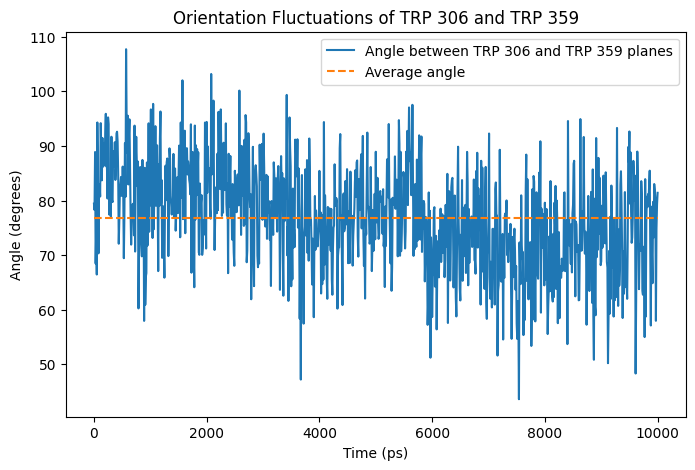

In [8]:
# Define three atoms to define the plane in TRP 306 and TRP 359
trp306_plane = u.select_atoms("resid 306 and name CG CD2 NE1")
trp359_plane = u.select_atoms("resid 359 and name CG CD2 NE1")

angles = []  # To store angles between planes

for ts in u.trajectory:
    # Get positions of the three atoms for TRP 306
    p1_306, p2_306, p3_306 = trp306_plane.positions
    # Get positions of the three atoms for TRP 359
    p1_359, p2_359, p3_359 = trp359_plane.positions

    # Calculate normal vectors
    normal_306 = np.cross(p2_306 - p1_306, p3_306 - p1_306)
    normal_359 = np.cross(p2_359 - p1_359, p3_359 - p1_359)

    # Normalize the vectors
    normal_306 /= np.linalg.norm(normal_306)
    normal_359 /= np.linalg.norm(normal_359)

    # Calculate the angle between the planes
    angle = np.degrees(
        np.arccos(np.clip(np.dot(normal_306, normal_359), -1.0, 1.0)))
    angles.append(angle)

# Draw an averaged angle line for reference
average_angle = np.mean(angles)
average_angles = [average_angle for _ in time]

# Plot the angle fluctuation
plt.figure(figsize=(8, 5))
plt.plot(time, angles, label="Angle between TRP 306 and TRP 359 planes")
plt.plot(time, average_angles, "--", label="Average angle")
plt.xlabel("Time (ps)")
plt.ylabel("Angle (degrees)")
plt.title("Orientation Fluctuations of TRP 306 and TRP 359")
plt.legend()
plt.show()

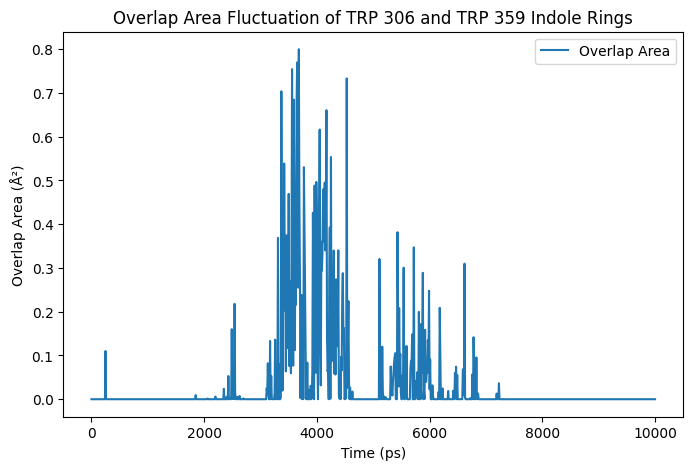

In [6]:
from scipy.ndimage import gaussian_filter1d
import MDAnalysis as mda
import numpy as np
from shapely.geometry import Polygon
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# Load the simulation files
u = mda.Universe("md_0_1.gro", "md_0_1.xtc")

# Select atoms for the indole ring of TRP 306 and TRP 359
trp306_ring = u.select_atoms("resid 306 and name CG CD1 CD2 CE1 CE2 CZ")
trp359_ring = u.select_atoms("resid 359 and name CG CD1 CD2 CE1 CE2 CZ")

overlap_areas = []  # To store overlap areas
time = []  # To store time points

for ts in u.trajectory:
    time.append(ts.time)

    # Get positions of the indole ring atoms
    trp306_positions = trp306_ring.positions
    trp359_positions = trp359_ring.positions

    # Project the positions onto a common plane (e.g., XY-plane)
    trp306_projected = trp306_positions[:, :2]  # Take X and Y coordinates
    trp359_projected = trp359_positions[:, :2]  # Take X and Y coordinates

    # Create convex hulls for the indole rings
    hull_306 = ConvexHull(trp306_projected)
    hull_359 = ConvexHull(trp359_projected)

    # Create Shapely polygons from the convex hulls
    polygon_306 = Polygon(trp306_projected[hull_306.vertices])
    polygon_359 = Polygon(trp359_projected[hull_359.vertices])

    # Calculate the intersection area
    intersection = polygon_306.intersection(polygon_359)
    overlap_areas.append(intersection.area if intersection.is_valid else 0.0)

# # Plot the overlap area fluctuation
plt.figure(figsize=(8, 5))
plt.plot(time, overlap_areas, label="Overlap Area")
plt.xlabel("Time (ps)")
plt.ylabel("Overlap Area (Å²)")
plt.title("Overlap Area Fluctuation of TRP 306 and TRP 359 Indole Rings")
plt.legend()
plt.show()


# Assuming `overlap_areas` and `time` are already defined
# Apply Gaussian smoothing to the overlap areas
# smoothed_overlap_areas = gaussian_filter1d(overlap_areas, sigma=10)

# # Plot the smoothed overlap area fluctuation
# plt.figure(figsize=(8, 5))
# plt.plot(time, smoothed_overlap_areas,
#          label="Smoothed Overlap Area", color='orange')
# plt.xlabel("Time (ps)")
# plt.ylabel("Overlap Area (Å²)")
# plt.title("Smoothed Overlap Area Fluctuation of TRP 306 and TRP 359 Indole Rings")
# plt.legend()
# plt.show()